# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("City Power Consumption.xlsx")

In [3]:
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


# Verifying the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop("S no", axis=1, inplace=True)

In [7]:
df

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...
52578,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [8]:
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52260 non-null  float64
 1   Humidity                      52557 non-null  float64
 2   Wind Speed                    52512 non-null  float64
 3   general diffuse flows         52275 non-null  float64
 4   diffuse flows                 52568 non-null  float64
 5   Air Quality Index (PM)        52565 non-null  float64
 6   Cloudiness                    52583 non-null  int64  
 7    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


# EDA

## Univariate Analysis

In [10]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52260.000000,52557.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,18.827863,68.285455,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,5.813053,15.545151,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.430000,58.330000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,22.910000,81.400000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [11]:
print(df.isnull().sum())
print("---------------------------------------------")
Percentage = df.isnull().sum()/df.shape[0]*100
print(Percentage)

Temperature                     323
Humidity                         26
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64
---------------------------------------------
Temperature                     0.614267
Humidity                        0.049446
Wind Speed                      0.135025
general diffuse flows           0.585741
diffuse flows                   0.028526
Air Quality Index (PM)          0.034232
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64


## Bivariate Analysis

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns # This df is numeric hence we might avoid this LOC, however if we had categorical data then it might help. 

In [13]:
def draw_boxplot(df, column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.grid(True)
    plt.show()

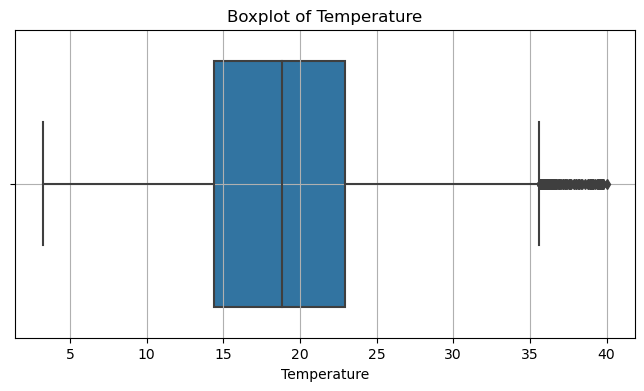

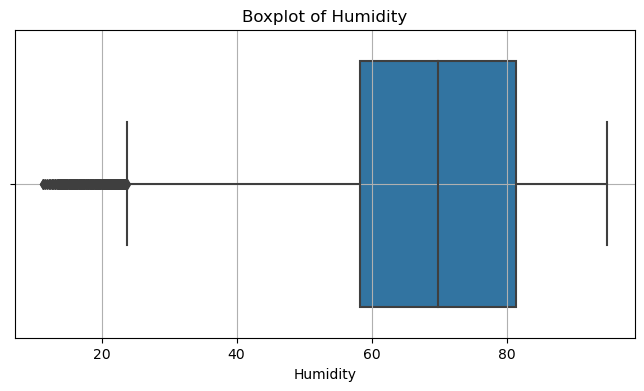

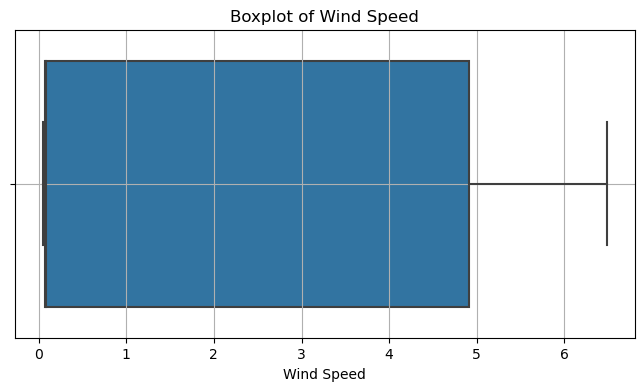

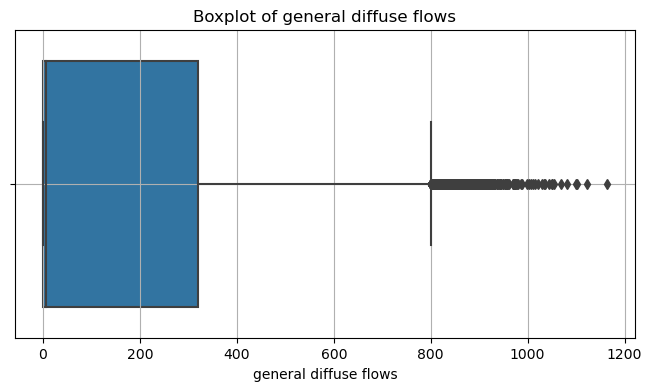

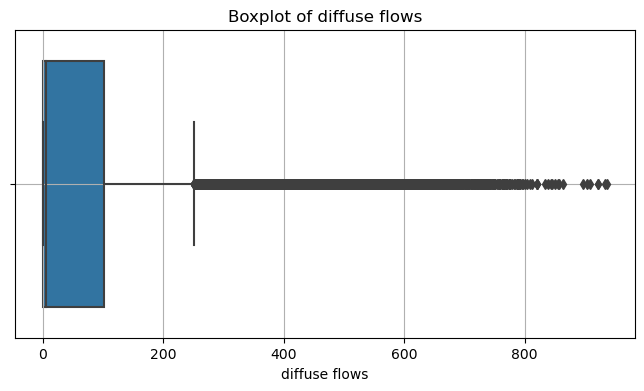

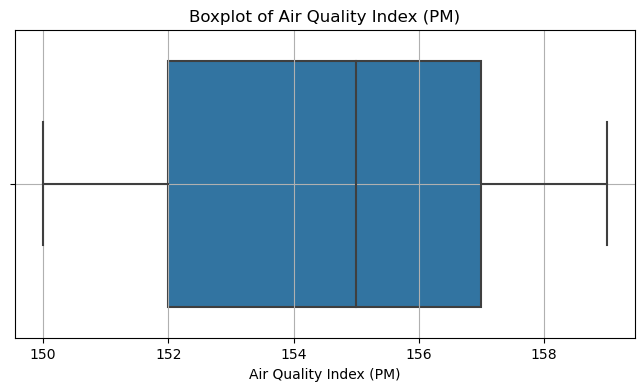

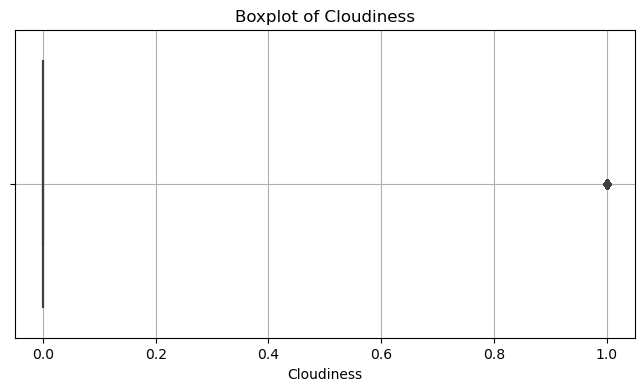

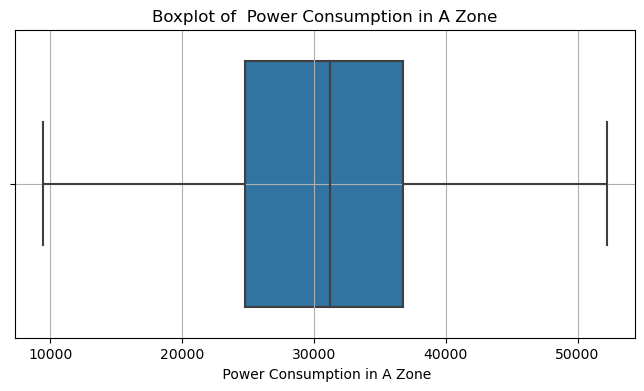

In [14]:
for i in numeric_cols:
    draw_boxplot(df,i)

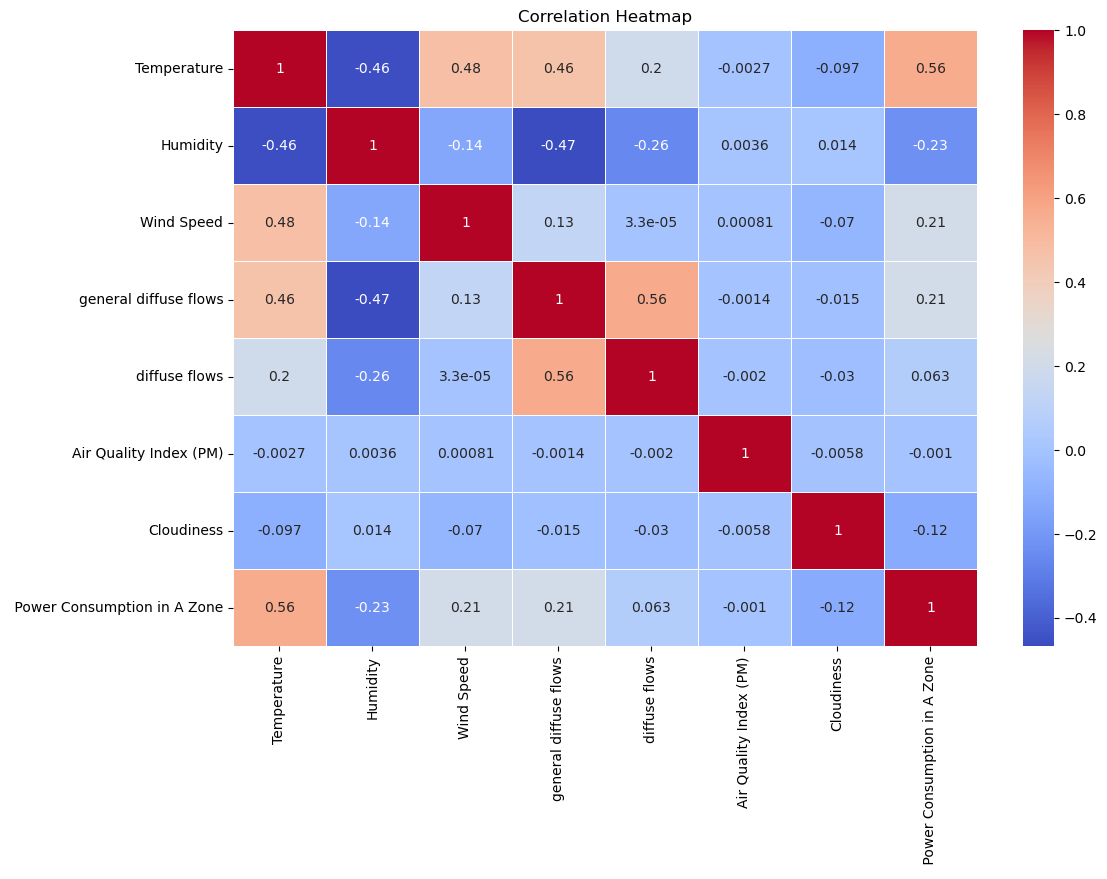

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Train - Test Split

In [16]:
target = " Power Consumption in A Zone"

In [17]:
X = df.drop(columns=[target])
y = df[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Imputing the Missing values

In [19]:
imputer = SimpleImputer(strategy='median')

In [20]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Linear Regression

In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

LinearRegression()

In [22]:
y_train_pred = lr_model.predict(X_train_imputed)
y_test_pred = lr_model.predict(X_test_imputed)

In [23]:
# R² Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Train R² Score:", r2_train)
print("Test R² Score:", r2_test)
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train R² Score: 0.32538322934354846
Test R² Score: 0.331026125075924
Train MSE: 43357740.93396582
Test MSE: 43215505.10340194


# Random Forest 

In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_train_pred = rf_model.predict(X_train_imputed)
y_test_pred = rf_model.predict(X_test_imputed)

In [26]:
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

Train R² Score: 0.9482866651634176
Test R² Score: 0.6383964899587742
Train MSE: 3323625.311736866
Test MSE: 23359474.740875635


In [27]:
# Trying to Optimise Model

In [28]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt']
}

In [29]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)


In [30]:
grid_search.fit(X_train_imputed, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=1)

In [31]:
print("Best Params:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test_imputed)

from sklearn.metrics import r2_score, mean_squared_error
print("Test R² Score:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

Best Params: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 150}
Test R² Score: 0.6109408229808163
Test MSE: 25133102.32317532


# XG Boost

In [32]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_imputed_df, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [33]:
y_train_pred = xgb_model.predict(X_train_imputed)
y_test_pred = xgb_model.predict(X_test_imputed)

print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))


Train R² Score: 0.6663726534785692
Test R² Score: 0.5594861583648638
Train MSE: 21442289.44217739
Test MSE: 28457057.719126917


<Figure size 1000x600 with 0 Axes>

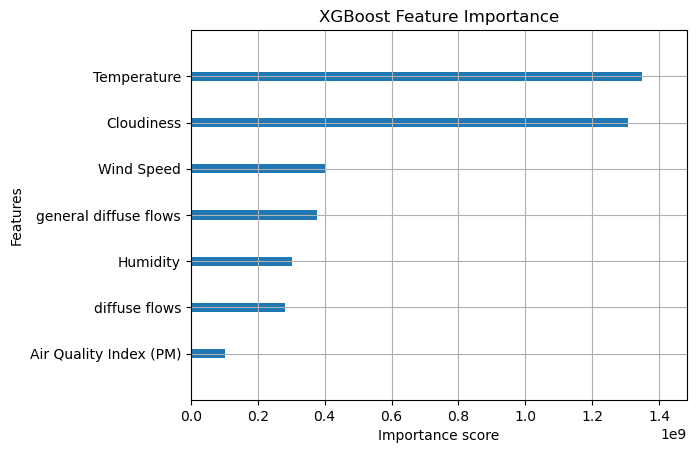

In [34]:
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importance")
plt.grid(True)
plt.show()


# Tried below steps to improve accuracy however it decreased the accuracy. 

# Remove Less important Feature to boost Acuracy

low_importance_cols = [
    'Air Quality Index (PM)',
    'diffuse flows',
]

X_reduced = df.drop(columns=low_importance_cols + [' Power Consumption in A Zone'])
y = df[' Power Consumption in A Zone']

X_reduced

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert to DataFrame to preserve feature names
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Fit model again
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_imputed_df, y_train)

# Evaluate
y_pred = xgb_model.predict(X_test_imputed_df)
print("Test R² Score:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))


lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

y_pred = lr_model.predict(X_test_imputed)

print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)

y_pred = rf_model.predict(X_test_imputed)

print("Random Forest R²:", r2_score(y_test, y_pred))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred))

In [35]:
features = ['Temperature', 'Humidity', 'Wind Speed',
                       'general diffuse flows', 'diffuse flows',
                       'Air Quality Index (PM)', 'Cloudiness']

In [36]:
new_data = pd.DataFrame({
    'Temperature': [25, 30],
    'Humidity': [60, 70],
    'Wind Speed': [4.5, 3.2],
    'general diffuse flows': [100, 150],
    'diffuse flows': [50, 65],
    'Air Quality Index (PM)': [90, 85],
    'Cloudiness': [70, 40]
})


In [37]:
predictions = xgb_model.predict(new_data)

print("Predicted Power Consumption:", predictions)

Predicted Power Consumption: [39161.996 36974.043]


In [38]:
new_data_1 = pd.DataFrame([{
    'Temperature': 28,
    'Humidity': 65,
    'Wind Speed': 4.2,
    'general diffuse flows': 120,
    'diffuse flows': 55,
    'Air Quality Index (PM)': 88,
    'Cloudiness': 60
}])

In [39]:
predictions = xgb_model.predict(new_data_1)

print("Predicted Power Consumption:", predictions)

Predicted Power Consumption: [37480.906]
